In [1]:
pip install numpy matplotlib torch torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import random
import matplotlib.pyplot as plt

In [3]:
# Ensure reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

Round 1/10, Train Loss: 0.8864, Train Accuracy: 0.7879, Test Loss: 1.4999, Test Accuracy: 0.6973
Round 2/10, Train Loss: 0.6899, Train Accuracy: 0.8544, Test Loss: 0.4279, Test Accuracy: 0.8900
Round 3/10, Train Loss: 0.4015, Train Accuracy: 0.8892, Test Loss: 0.3466, Test Accuracy: 0.9017
Round 4/10, Train Loss: 0.3498, Train Accuracy: 0.8997, Test Loss: 0.3132, Test Accuracy: 0.9111
Round 5/10, Train Loss: 0.3218, Train Accuracy: 0.9060, Test Loss: 0.2949, Test Accuracy: 0.9167
Round 6/10, Train Loss: 0.3028, Train Accuracy: 0.9122, Test Loss: 0.2782, Test Accuracy: 0.9209
Round 7/10, Train Loss: 0.2862, Train Accuracy: 0.9168, Test Loss: 0.2653, Test Accuracy: 0.9239
Round 8/10, Train Loss: 0.2720, Train Accuracy: 0.9209, Test Loss: 0.2552, Test Accuracy: 0.9279
Round 9/10, Train Loss: 0.2590, Train Accuracy: 0.9250, Test Loss: 0.2433, Test Accuracy: 0.9299
Round 10/10, Train Loss: 0.2474, Train Accuracy: 0.9292, Test Loss: 0.2329, Test Accuracy: 0.9328


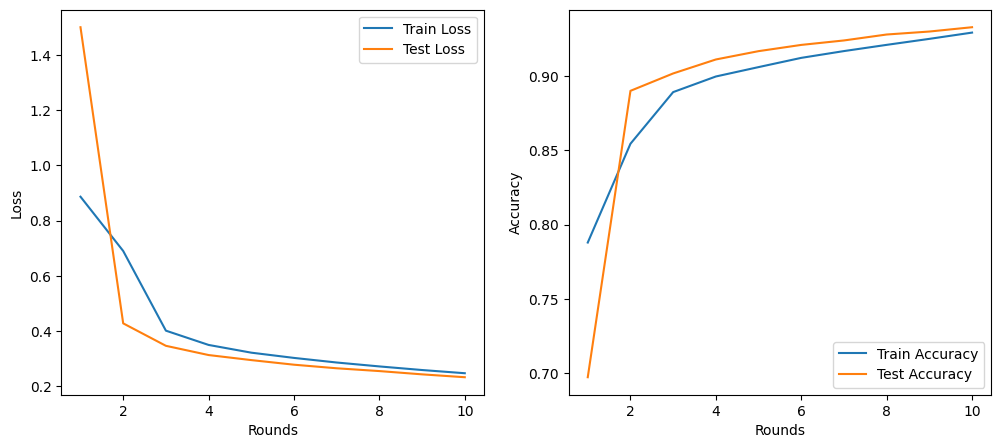

In [4]:
# Define transformations for the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Load the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Number of clients
num_clients = 10

# Split the dataset into `num_clients` subsets
client_datasets = [Subset(train_dataset, indices) for indices in np.array_split(np.arange(len(train_dataset)), num_clients)]

# Create DataLoader for each client
client_loaders = [DataLoader(client_dataset, batch_size=32, shuffle=True) for client_dataset in client_datasets]
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

AttributeError: 'int' object has no attribute 'item'

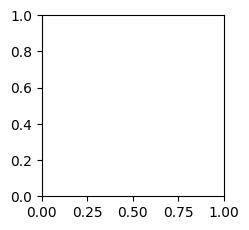

In [5]:
def show_images(dataset, title):
    figure = plt.figure(figsize=(8, 8))
    for i in range(1, 10):
        img, label = dataset[i]
        figure.add_subplot(3, 3, i)
        plt.title(label.item())
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.suptitle(title)
    plt.show()

for client in range(num_clients):
    show_images(client_datasets[client], f"Client {client+1}")